In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import math
from domain import (
    get_pixel_neighborhood,
    get_frontier,
    get_perimeter,
    munford_shah_fonctional,
    H_eps,
    H_eps_derivative,
    EPS,
    image_gradient,
    gradient_descent,
    grad_phi_part,
    grad_w_part,
    init_frontier,
    get_frontier_phi,
)
from scipy.ndimage.interpolation import shift
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimgdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPsAAAD7CAYAAACscuKmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO2de5RddZXnv/u+6pFKVVJ5EZKQkBAhtAgoIIraiOL4wEc7aqttyxppca3pnqG1HYXpmeludWZwrelWZ9qlMgMDq8cWtdWGZaMtg9C2DiLhGSCEPEigSJFUJVWpd93Xb/6om/vbe586v3NvVeVWwdmftbJyfvU7j9899/zu2fu3X+Scg2EYL38yiz0AwzBag012w0gJNtkNIyXYZDeMlGCT3TBSgk12w0gJ85rsRPR2ItpDRPuI6PqFGpRhGAsPzdXOTkRZAM8AuBJAH4AHAXzEOffUwg3PMIyFIjePYy8BsM85dwAAiOh2AO8FEDvZc+3LXFtXb2NnJ9l08V1w+g+Non7nSP/u8fOqvuA1dR9rR35aQ+cJjSeByGcJndeYH3N9/pqhwe+sOHoc5cnxWUc0n8m+AcDzrN0H4LWhA9q6enHOez89ax9VZdtlVTsTv2+5vfG7TVV/1zKl8BiCk52NJzRWAHA5f6KqvuP6R421g+NR56KK7MuUA+dRbWpCunPkBzHX4yJEfr1V90JdJ3TN4EkTjuU/5oG+pPMGf6D1d8iPY8/0M3/3ldj95qOzz/Yxoi8uomuJaCcR7SxPjc/jcoZhzIf5TPY+AJtYeyOAw3on59xNzrmLnHMX5dqXzeNyhmHMh/mI8Q8C2E5EZwJ4AcCHAXw06SAuqnDxMiLearFZicqcTIXtrEUjLd6ydkS81UPg4pn+WQz9TIYkVjUeLbqJa+rPrPbNMUGJi3IA4DIU2xdSD5LWPzLVeFkzco/4JUKieIK6cirQ9yQEv5cz7dCJ1bGqTYHFJxe332yXmcPC+pwnu3OuTER/BOAfAWQB3OKce3Ku5zMM49Qynzc7nHN3AbhrgcZiGMYpZF6TfU7ESB9avNVifXY6cA62qh4Rf1RbiPx6Vy0+MvEtIrox0ZMCffq8mSTxi692a/FWf5ay/0PkcwdUmyRRU+zahLQYHG/gGhFRV52nml0guV6oK3MXzUMkrsa7mG2oe51kkeDqcIPfkbnLGkZKsMluGCnBJrthpITW6uxO6swhXSw/OUeffe0dFtDRNU6Np8oUI6pqxZIdlzimeN1a64qhfams90XsviETXlA/XUgCJj1tzhJ9DZ5z1u5q42sVsk999wFTb+TQgP68lDyT7c1uGCnBJrthpASb7IaRElpuZ+d6ZjagX2VLTdjDhW06QWkK2XtDClZE54wfT9DlVOvhAdt0JqCj630jenhIZ2/GbhxZU2j8PHwNJHKewL3W6ywh/T7iJhyIyhNrMkn+GOX4vqYi2UJ29xaHIdub3TBSgk12w0gJLRXjyUm3WJFIIiKyannIb0YSFDCZMCmaiZv7tKktIu7yfQNujxETmXL9DQ8o/ryJ2XECCTSaMR2FiCQVEepBwv0LJeIIqCA82cesx4prBkxmWvzn31lC9KHsVKeZR8ag0D0RakcTiS3EeQL72ZvdMFKCTXbDSAk22Q0jJbTc9MbdZbnelC1KBSaql7O+JkYdMttovVbrjqK/mSywTRAxSbF7kujmukChqSEdVLs083ufFJoaGoNIluni+4CENZDQGEKmyyQ9PGAiayrsV5kRQ5lqhPtzQhYlsf7AjwscYm92w0gJNtkNIyW0POpNiirNRKSxRjDriRI7I7nWuelN9WmRleeq10MN/Uw2YcYJmpUSxHZhxpmPxxU7TzUXfw8AlbAz4bTi3uuxc3UgcmBg31ACR6jvdD7fQ8AEGsm7H/wO4+8SzzSUdM1oNCc7D1cVAmOxN7thpASb7IaREmyyG0ZKaLHpzclMLBXRJYnopyFFPXCcdqfM8e2EDKNclw24nzZl5gqY2gDIn98FSqoayQgUqhmndD5dDy/0eoi4vbJ2Na93jr9mcJ0gKWowcJ4QEfdZvrakzWeB8SbV5wu5CTdTjLNRF1mOvdkNIyXYZDeMlGCT3TBSQutDXEXdcK64yX21S2yosCPXWbQernVFrr9qPVzvK4oj6qwnfA1BjX3idLnviqf9dqlL7jvVKw8ud/pju/r0eFSbjSHk7plUpYTrf9r2GwwhDVU7Ue1MMX4MIRsy0KTuzT9LKV7XTnL1dYG1k1D2nqQqPhy9HhJX9HSmHf9ZKLCmIa4X31U7mOgWIjpKRE+wv/US0d1EtLf2/8qk8xiGsbg08pt5K4C3q79dD+Ae59x2APfU2oZhLGESxXjn3C+IaIv683sBXF7bvg3AfQA+3+zFuZisxfZKXpvMGrNDaXG/UiDVDh0bKlygs6cwE+K7jom+6lOrRLvc4bfbh6ScVeyW5+084tv59x4VfVM/WRs/vlBt9AT3Tm5aipgj9RMSEDWD1w3VhE+I7hPRkSWtTgWuH1ArIkGVWnWY43kT9w1cUx6nxPZAZp1TXdhxnXOuHwBq/8c/hYZhLAlO+Wo8EV1LRDuJaGepOH6qL2cYRgxznexHiGg9ANT+Pxq3o3PuJufcRc65i/KFZXO8nGEY82Wuprc7AVwN4Mba/3c0cpAjFa7IdPaIyUyb3oJumv5YrZNH9cF4k1kktJIdq/XTKltTaL+9V/S9/7P3i/bP/8fr6ttTK+VFCyPyouUO33/0Wan7L+sQTWHOChebkNeI3Ov2eBNesFBFku4aCHHl6wT6GuHMOeo8ATfSiHlNXERdUz9fIZ048DmTTG+yGGfAnNZEGG2jNGJ6+w6A+wGcTUR9RHQNZib5lUS0F8CVtbZhGEuYRlbjPxLT9ZYFHothGKcQc5c1jJTQ2hBXIlmRhYdAqpEEw08DunXIlREAcsxOG6qwAgDlHF9TkH0j53pfx9P/+4jou3PfeaKdXePPk1Vuo3qNoWPAj29qVA5o5Vv6RfvEXevr2xE7LNOJdYWVkB27mRDSZkJwdZgoR4fgZvS+c9WfQ/smhFQ3learmX35+LSdnYe/Jrk4C3+HxgZgb3bDSAk22Q0jJbS8SISoa87EN+0eGyIi8rNotey07AtmFVHnLbcpl1hmEnrNxx8Xfb84cFZ9e2JLt+i78sxHRfuney9i45PXKC3XNhY/wPwJ2fXC7nWi3TPNXHZ1oQV2P3U0XyT7DCNSa15HG4ZEan1DuRlMZVnlZqeQ2D7rdULMseb5fExboWOjalG8GjkXF9hmsDe7YaQEm+yGkRJsshtGSmipzu5I6ZK52c1ws8L1G7VvbtJvR7LNaPfKavy+OrPJyDa/fX/fFtFXPuFtZrkJ6e+5tWNAtEu93sZSysprZEblALkLbKVNjq9akMphdtofW+qK9w3NqHWM4E98ks4eCFttKmQz4HYbNJktUMbd+awDRPTwUCWX0Oeez5j4JRu8J/ZmN4yUYJPdMFLCopreOEkiTJUfp81pgei0yHl0sQJ+HiUOdR30f8jsXy768iw6bfA8eRtvvvWdon3hu/fWtw+P9Yi+I8/JiDmX9R80Mta8vEmDr/Vy84pdOkwQDRNSoXSiyGaKcTZVb1wMKNBeIJNUkugro9Pi+2ba3PWtmUGoZhMFOOT1A4lHGfZmN4yUYJPdMFKCTXbDSAkt19ljaSIKKVRUQJuKyh3x+0YixfSQmJlMR+Flp+JdVQsyCA65jB9wVSlVHasnRLt4zK8NZIpy39yQ/LrKa5hCrdPA8kMT9EhxT7RO3pSZSZ14gXRtft5EE+0crzMv99QmTIPiMpFCmA0WL0VzaycxlzMM4+WKTXbDSAk22Q0jJbReZ4/LsKFLdOjDQuoM09N15pdIOCfPuhpw7wSkOT/rwrqsOE6tGxz436+ob6/92CHRNzLeLtrFNd71lqbkb3F+RLbbu7zOTlX1wUVhRx2624QLZyhbalJxxGaqqjRIkr2+UdfRxOs0s94QuNehrLqhyjyJbsExa1jzKuxoGMbLA5vshpESWlufHVJ05iIXKVkpmjgyPkJOZJ9JiMQS/U24TEYivEImqIA777FbNou+7g8PivZYxp9sckjaDTPHpX4wddyrAJ1afON1yrUKomlGjG/GpHcK3FyToCbMYAKtpYUSV+pDAyazSF310LnmqoIEinFw7M1uGCnBJrthpASb7IaRElprenPKTMC7kpLiB/RKYUJbALfC+qmYLqYzjnATiy6cGDlPYOxvOG2/aD8+vKG+fWBSxrhOrVMuuyP+6yNVHJGjTYzzCjedI6F1lqh5Su2rs+Xwviaek2YI6f6RZ1WYcxOeBZ5BKJTZZ65mTDO9GYbRSBXXTUR0LxHtJqIniei62t97iehuItpb+3/lqR+uYRhzpZE3exnAnzjndgC4FMAfEtG5AK4HcI9zbjuAe2ptwzCWKI2UbO4H0F/bHiWi3QA2AHgvgMtru90G4D4An086X5wO7VRxv4i9nCkmoTRBGaW76oKCoXBJXWDQZeIVoAz7HPoz6c/C7dg6VPa0Nln2ZW9uLRusvqi8TqXX+wJni1K/57pjkgup8H1IKIzJq/Fo+3JIf46mcuIN2VdaJts8e3BkTSakT4cqwCQUiFwod9nQmlHwe5lPockYmtLZiWgLgAsBPABgXe2H4OQPwtr4Iw3DWGwanuxE1AXgBwD+2Dk3krQ/O+5aItpJRDtL02NzGaNhGAtAQ6Y3IspjZqJ/2zn3w9qfjxDReudcPxGtB3B0tmOdczcBuAkAulZucnGFBLRLpxaFMwFTSG7Ky4ShQgUaLVKT+unTRSPkAOPHA21+4Z9F7fvOridE+5nx0+rbI2tlRNyhQ2vk+JjpTZv/hAgdMBVptBqkI/hEtJX6nFl17/mxWgytFOLdn7NT8dfU908X+dTj54TMcmHTVuMRj82gn79MIOotZO5rVMRvZDWeANwMYLdz7q9Y150Arq5tXw3gjsYuaRjGYtDIm/0yAL8PYBcRnaxF/O8B3Ajge0R0DYDnAHzw1AzRMIyFoJHV+F8iPpbmLQs7HMMwThWtDXF1Lta1VOsvUfua38wqXVro1qFqHVAusEof1VlthK4WyH6rTXYhfUt//s3qcy/L+SqM0xU5wPxyWaGxBF/5MaP2BR97E+agyPcQ6Neuof/ihl+I9v8b3FrffuOafaLvdct8lZxfjp0t+o4p29s0U8wHprpE37O3b5cDdPF6b1ZVt+FETIOh714fO8cqMBHX2ib08Llk5DF3WcNICTbZDSMl2GQ3jJTQ8uyy3DYr9GetR2o9k+s6RWVT5hk7E0IM+XkjYaE5fV7WUKetcjtxxM1W7ltpY3quWm+YcNI43cN8Q7sLUkd/cVRWfKVig7/Vyk6s9fJQWi+t977t07/051GK43OTcnzbun3KrTa1IPLU1Mb69lC5U/S9ofsZ0b6qc6C+fbyqFG8VkXHjEb9m/IHeB0XfZ//Lp3xDfa6Ifb4S7xuh7e78eYy4SgfdcOdusM/MIZTX3uyGkRJsshtGSmh5phppXuAms7AozE1WWlQPZYoJidiRDCihSCgtnfHzJLg2Zqfjx5dXJx4qeZF2rCQLP+SWSVG4ygpMhNQXLbZrF9gsE0OnPj4k+rb3yuy3b+p6ur69t3ia6Ouf7hHt3cPr6tuHJ2TfwKQ3r71m9fOi787BC0X7ULfvP1rsFn2PDm0U7Z6CV4NuPPQO0XfG1d789761j8ixl2Q6hju/6NWBcru8f/lxFX1YmIMdLImEoilcBRCql2WqMQzDJrthpASb7IaRElpvemMmNsf0VV0RJlT0LqKjB7LPRPTpTLzJLBTSGspwGq36EX9eboYDgLyKq+3KenPbiQlZEcap8+ZP+GNdVqcjjc/s0/OJPtH+nfVef316cr3o295xRLTvG93hr6/Sox5UpsG/3n677ytLnfjAtNfn90/J0N2RkgztbWc20v1jq0XfvkPrRHvrGT7SeuvyY6LvrE7fd6Qs1xDyKjb64s/vRBwfXvmAaF/3Z39U39au3HMlMSty3DNvFWEMw7DJbhgpofVFIkQ2Di9zVLXHnMp6kp1mYmogAg0qCWI1n1HtQBG+gPnKKfkolDAxUlCCqQD9V0pXLe1BN1Bc7o/TXnsl+Vl6d/tBRMxpzEp35X+Q0Wg6qmxNbrS+vZ9kKsHB0nLR3tDmTXOXdsgCF59U4i2/RecVpAlvvOoj9gbLMpJte5dMevS73U/Vtx84caboo5xUX35rRX99+/xl0qS3reDPO1yVXntf2P0u0R4a8J+7TUUb3jF6gWi/+zov8t9132tEX+8u+XDkpph6FXmm5qYChDw9OfZmN4yUYJPdMFKCTXbDSAktN70JAuYhrXsIq5M2p2XjzWlOfUKuF4XcWAHpZqoLIgi3X3VcKBPod978LdG1tyTNa5MVX+zhtJ5R0XdoSrrPcpPLia3yd/vaj9xV39ZmpQ/1SLPSt469qb69rX1A9H2852nR7iKvaz9TkusP2jr5zeOvq2+/rXuX6Dun4E16KzITou9iVTjj58wcOFyU9+tv3/A/RbuTRdc9OLlF9N075s2G9/TL7DjTJfmgbN0cb8J7dGCDaO8b9abD3Bnjou/0i+X6w+FbfPae/KQuFuq3kzLVzKVohL3ZDSMl2GQ3jJRgk90wUsLi6uzctt5Eob2ITszPk1D9RIYDhqvQcJt8pGghPy4pGpH9pF7YJu3Cj6nEK6vbfImsh17YJPoq01Ir3vSvfYbWv97wE9H3mjav3986Im3nOwrSxvzV9V6HLym7fzXwiGzNy2KSv5ySbq79U94ldW+bDIctMeeDq7r2iL7ujBzf+5YN++3t/yD6sjpFMFs52Jx7VvR86ajX/dd2yvWQE5Ny7KPTfm3iF8e2ib53nPWUaP+q3+vh02Ntom/XYekX8B9v+EF9+4s/fb/oO525QyRmjw1VJIrB3uyGkRJsshtGSlhcMZ4TSswHZV5LqAsuzqMLPXLNQWdwCSRijETTxV8yahZhakYbSdH3YElGX3VmvFx/Rq/MGvPMiBSFP7X+vvr21158q+gbLnpR+LJe6db69WEpav5Bz4H6dk4Z0DKq/WvmObpraovoe256lWiva/PFfn95QhZzGC9LMyJne9uLov3Y5Ob69tY2acr6v8O/Jc9b8ef9yOpfi74nT3gx/pl+qdpUy+oLZl7C2m25rHyTu9r8TXnVudJU+c8Ht4r2F+/yovuqs6VJb2yfN+F1HQ5XKA0mCY3B3uyGkRIaqeLaTkS/IaLHiOhJIvqL2t/PJKIHiGgvEX2XiOJ/qg3DWHQaebNPA7jCOXc+gAsAvJ2ILgXwZQBfcc5tBzAE4JpTN0zDMOZLI1VcHYCT9qB87Z8DcAWAj9b+fhuAPwfwjeDJCJEQVNEnLqyawtalMsOwgyO6tDaZ8Uw5WvfXbZ3wP46EZP/nfOaJ+vZYdUr0TVVl5hVeaGFoSrqG5pdJO93/GXh9fXv/CXmerrzf97vPvlr09XTIMXyMFWXIqzuYV6atHw5dXN/OqUoFP3vuHHlszuudp3VJU9clKw/Wt7eo8Ne7hs8X7bGKX2PYeWKz6HvwkGyXJ/0j/fAqmXl2csqvl1Qm5KNPk/Jz3v6mr9e3/9WTHxd9Xzv9ftH+9nKv///XXTKjbWlImvSo4O/v4D65xtHOlm86ZYIgERoLyPUlGVId/yw2pLMTUbZWm/0ogLsB7Acw7Jw76RzdB2BD3PGGYSw+DU1251zFOXcBgI0ALgGwY7bdZjuWiK4lop1EtLNUHJ9tF8MwWkBTq/HOuWEA9wG4FMAKIjopC20EcDjmmJuccxc55y7KF5bNtothGC0gUWcnojUASs65YSLqAPBWzCzO3QvgAwBuB3A1gDsauWCs7k1h27lI4aPdXJsoyCGzy8q+ak7v67d1RttIyCtDVxC5+QxfDPEfJlaIvhMV+QP4wrhX3HTYZSYjx3D/c1v8vselfk8lPwaehRYAznmztAUPVrxu3auusbMojSzPjns9c/cRaff/nbMeE+2Hh7y777FJ6QLbtdqvG4xUpV77B6t+Kdq3HL+svv3kcZn9tqxciHkKqfEJ6U/QtsuPIadec1nltvyeH326vl3tkGsTt249XbQr7J35qXP/WfR97X7p/5Ab8usGl13xhOgrMfv9uvePiL5PrPqVaL/7Dj++jfc2Fu/aiFPNegC3EVEWM5LA95xzPyaipwDcTkRfAvAIgJsbuqJhGItCI6vxjwO4cJa/H8CM/m4YxkuApRv1pgmI/GK3iPlM7xDaNz4bjXallYQz41acFwOPqUyqUyqVzjJmMnt+XBZdWNkjFzhHHvMidfegHMPoVj8It01mgunIygKR2/J+TH82IN1PJypSjN++3GeyGS9JMfmfjpwl2nlmmhubkvv+zQH/ntjQLUXW40rkH2XHjgzJPk2l7L/wyogc+8SZ/nMXjsr7nh/TGY5YRqNR+RB9v19mkP3LrX9X377mqd8XfZlReZ0q85b+zQtnyH2ZCjUxLqPlXjhTqn8f/W0v1v9w4I317fKv459Tc5c1jJRgk90wUoJNdsNICS3X2YWeTDF/xyzVWULF6VmXrviizXIZdl5dRUW3Q6GDvE+vC9z/374p2s+Vvc7cnpH68qFJ6eb69GFfqJCelyapY8elDrqCFTwpSpUOjmXEqVTkb/on1soKMfw3/++ffZU8j9rz4tP8RV8cldViMiq298SQNyuSKjxZHffK6/AJ5X+hK+EU2Q2uyi+0a7Vcxzit27vlHiK55lFiOnzbkDxPUdadRGefv2bXC3LsH7zqIXleZqMdn1YZgLPxi1GTffL+occ/G/k+eZ6dR14h2gPn+3WWyW3e3Oja5ukuaxjGSx+b7IaREmyyG0ZKaK3OTpAmabat3VEjYawBm7dIWRXJPKtOK9xlZWdG2cdFhQ6lv4s0VWrogxWpR/JEVOcV+kXffSqmqDrg9fSe5+X4plfIxYEK85CtSPUexCq+6uqv5+ZliOu3R71b6+iIdLtt65BrDD9/0oexZk7Ixyd7urTnZ/L+poWigKlfDr7SIyvN0BTPD6a+0PvlYsWz67rr29WCumjet0e3y2vkTsh728m+plKn8mFQ7r2f3veh+vbEoW7R175xTLTpYTY+maEMZabvl7rlA5ddLSvJ/pvNP69vf+awv34o06y92Q0jJdhkN4yU0Fox3imTlRCTpciVKSlTTd7/LmkzXaUQL5pni+o8IbfXQIZbPT5uCtRRbl84crlo/+V6n+X0n5Sp7Z4D0qTSPug/Z1lK1MhLKVmIgdlJ2ZeZ9GPqOF12/umLV4j2T3a9sr69eq10XR0ckOahlWu8aWusU4qz1YrKTJv1elE+L3WkiRE/+MKwUsvGpXxbWubvvbJcRj43VwGW7ZXmq8KIP89Ur7xm5xH5/XYcY66+p6tsPX0yVKRvj89U0z6g3p8DUqzPMml8ulc+m/kRf2xuXF5z1Svk9/LZOz9W3z77b3zf0Ivx9mJ7sxtGSrDJbhgpwSa7YaSE1oe4MhsMT06aKYbLWoQyzHC0bu1Cbrb62EgRyPhMtNy1NlOSB06rlDePF72+umdKZlopTkj9lCeQ1Z9zsldepzDCstFIlQ5TrODJjef9UPR97rF/KdqUY/rppAxFzQ5KvXeo5HVQmpbvityYbFc2eROf1ufzI76dlVYllNVTycNPp9ZLk1lpTO7c85gf7+Radb9O+G1tSu3ql+cttzPT5ZWyMs/zL8issJ0bvHltelrq6IUT8VWG+PoMINdgqq+U2Xh/d5N00e1f5zMaPfx5/5ldWZpVOfZmN4yUYJPdMFJC601vLOos5BWn4f2RjDIBT7fIELjXXing1oWwZ540y8m+a9bIqLKBijdfHZ6WhRxRiv+9raqCWuVlcrylFV49yKlsKhvP88URfzMu64tPviCz5fCsLFNT8jykvNC4N1tmlczS+MaL94r2+1f7uu9ffOYq0Xesz5vtSir4q/cpeUMn1zCROi/HN71K7suj2ZapfMedg37f7ueU2WtcivFDn/Ti8G9v3Cf6NmwbFu1bn760vq2j3DJlFaXX5687skV+91zE3/yhXaLvxyqCL9Pm1a3yG871HTtlwktxTGyPYRgvK2yyG0ZKsMluGCmh5VFvjmXnJ+YS63Lx+gugzFABVTsS9aZ/zijehBdxiRWd6rQBfb9dpZfNk9cHj02rrCzqvMUef16to7sOnbbWH1xZJ/Xnf7f1p/XtL+19l+jr2CAjsSYG/Jhyx+UjwfV5AKiwaCyn1iru3SNdf3/+sNclC0PyZheYOa3jqLxGsUvelO5D/v6V2+X4VjwkBzHd7Y8tjMm+qV7/MGQ75YNR+rfHRHtDm9fZD0/KdZaHBjeJ9jQzn7Yfk+dtH5SfbfBCP753XPGg6PtVv88oe+gvXi/6tn1jv2hPXOAz02an1XMRg73ZDSMl2GQ3jJRgk90wUsKiVoSptPEMJKpTtXkmG63PV0MVYgLXz49LXUeMB2Ednuvs2kfg60ffLNrdOa//7T8uQ1wzKpSx0u7Pm1snY1pLJ1ShwlU+vrOtIO3Evxj1GWWcWsjgOjogi0DqO1lRdvZcl48xLZ+QjgAdh+XjxI9duUeeJ1v07Y4Bud6QmZLfy/Rq/7nbhtU6hs4QzFxOh89SPgNMhZ9+tcwmVD0u3Vy3nTnox6r8qB86KL/DVTtZQca7nxd91QG5FrBqwn+n+9fLwpgdr/cpbjur6h7s2CDaPARchH8vRKYaIsoS0SNE9ONa+0wieoCI9hLRd4mokHQOwzAWj2bE+OsA7GbtLwP4inNuO4AhANcs5MAMw1hYGhLjiWgjgHcB+M8APkNEBOAKAB+t7XIbgD8H8I1mLp6dZqKITiKp659z19p8vKyiTWJa5M9MxfvTRiLmAjXYK21M9FWn/Nnjsjjiedv76tvDA9JVNT8pr8GsdKhW5eA3bRkU7b4jXuxb0SVTtgxO++scHZQiKnVKkX/ZE951tdit7kGXFCcdSw6pb09G1Thf9oLfbj8uz8Pdpoe3SfUkRLlDJX9cJkX1KRbpllWZfabWsWKXU/LRL3TKFDiPHvFic2dBpcdRdB/0H7x86PnAnpLKcRlNlwTQUEEAABLPSURBVJvyJr38mIru65Tj5cVOREGVgN7a6Jv9qwA+B+DkY70KwLBz7uSI+gBsmO1AwzCWBomTnYiuAnDUOccDamd75c36m0JE1xLRTiLaWSqOz7aLYRgtoBEx/jIA7yGidwJoB9CNmTf9CiLK1d7uGwEcnu1g59xNAG4CgOU9G5OqsBuGcYpInOzOuRsA3AAARHQ5gM86536PiL4P4AMAbgdwNYA7GrqiizdZCbS7LFcQA2Y5rXdnp5W7Z4GFSxbUOkGgCCRJFUpcR59nx2eeEe2Dn/TZWzuVzaKgMsyMneHPe/bpR0RfVQ3wjNOO+/PmlcLMeOVm+Tu862np7jm23euk2WH5SHTukwMurvDjW7FHXSijzHRTvj22Pv5Rmzgtfn0GAKZX+0URXfAzq9Y88ix7T0UtBeQm/HdfKcsMQat/Itvc7bb37+X3uWJU6eU8oxEUyiyc2+i13ckd0vSm9XRxnDJHcnNbo8zHqebzmFms24cZHf7meZzLMIxTTFNONc65+wDcV9s+AOCShR+SYRinAnOXNYyU0PK0VHH6dSQLrLKXc9s6VZVtmqkzOtyv0ibtsCEbvdbvxTVUZUKesipTVMd1yEopG775mL/+uLRI5DacLtrFM31a2Ce7pW69aeuAaHMdfmRaXnNwwrvEDjy/UvS1v6hstiy7a+eL+nOqtFQsrHblHmnIHrygU7Qn1vp926RJWWS/dUrX15Vwlh/w76RxtcbLM88CMlNtViVaHV3LwnPb5XMyfJZcm1jzmF/HcNNyPcQV1foIfzYyqiqOehaKW9f4wwJLVhWtk2f0M9+YbV2corHdDMN4qWOT3TBSQkvFeHIOGS5mM9GdlChXzcb/DmWmpX9qlkUAabG9ooouikKPCZF22el419pqgUfsKVG3U8qhbsyL7pSX4mLlyFF5zUEfJbXjCVU4cUyqAM987TX+GsoFNlvwY89MyXup3Vp5pNjQubJPZ6rp7Pf388hrpdgeyuw7uU6dl6kH2Sn5HfX0yWtOsSCz9gElzgZEWF3/vPdRpg6oYo2bv/W0HN+4V1Gq07KKRXbHdrnvQe8OXX3VWXJ8J6Qb8+Rq//23H5duuOV2NqaE4iYi6k1nW447pqG9DMN4yWOT3TBSgk12w0gJrc9Uw3URrusqc5pT+hY32Wm4mYK7wwJAJmBOyyjXS64HabReRGXmwqkOK26U1TsKU17nq47Ign2urFwkmTmyckL60k6/8yLRfsVnHq1vZ1euEH2Tr9xY3x7bIMdeVEVpuFtpTrmfZkpKH2RNfZ4OZbbj36nWn3mllM4j8gby8GEA6BhgWW2OqZutLnl8h9d7dWbX1Q/5+7nqfz0prylPI9ZWqCDXWWhEBXSx6iy5Q3INxnXLkOZMwGQmqgypZ9Ep13LuLsvNzdpELK4d22MYxssKm+yGkRIWNeGkKNiQC5tURDHHYCJIKf7oKCkucmcqSlRS5g5+zaSCkZxKh8qCWPAyrBYJUVHRTBUv1vPifcAshSnO9Wae8qNPia78iz5iTvrPNYc2FTo+3mpjxQlmI9PuzYrVKeXqltFZJOOvQzkVpfej+MixZuKrXZmZxbT35KQ0p1WGlHsgo/qKC0U7O8nNxCrBaSVkR1TRfvw5b/DZtDe7YaQEm+yGkRJsshtGSlhcnZ3pQkk6cahgA9e1tR4ePC6QwRaQOlQo06yGlJmwvN5rzbmyLs6o2sw1U+uymaL8bOUer9MX33Ox6Ov6xV5/Ca1ThlwxtX6qx9eMns6vQ/K9EtHTG72GXlfRpktOE7p/5J6w+5BdvUp2bZS+v7ken73X5eWUqqrnmmec0c8Ub+s1rOyE/JwiYrTBrDX2ZjeMlGCT3TBSgk12w0gJLc9UQ0yndjyMVdsYKd49NdKXCdkn47tIK+lqXx7G6pS7LNefI1ls1PjKnd7OnmtTdvYJpVcK3VYOKPerJ0R7+opX1bd1lp2JS70Nftkjz8nxvCiz1gaZhy1d6P9uHueJO2cSTYydctKfl69VlM7ZpHZW+v1yv3ZSVe7aUZfY+HUg4QKrsslmp6TO7nLsOqVA2DbD3uyGkRJsshtGSmi96S1OzCAdbaWjm/iBSmwO/WaFxD4l5QnRCFJULzwniypWe3xCx3K3zCgDndSSB/q1K/dTbTpyXCRLEFkTspmcpLRVFSNQqoTj7rzKNFh+9lBD13ip40oqfQ8z22XHVUaZHuXGXPT3LDcaELcBVDr8lNOFHrg5TbvOVjqkmpEpMRMeV4cXoj67YRgvbWyyG0ZKsMluGClhETLVxPy53EQMaUAv0e6xoUT8el8qSn2Vm0bK62QmGHrEVzWki3eIvooy0wkzinb3VAUHeAis7tN6Zdsx73Ja6lZ6OBtDcaXKaNu+Vu7LfvJ1RqC2ktRBy30vsMHGu5guSbj7rDLL5TZtFO3SRu8iW+5QLrD5eLNwtVOZ8NSzwDMp5SbVGEa9q7TLS5NsxLU2kH05joYmOxEdBDCKmSWtsnPuIiLqBfBdAFsAHATwIedcfGCvYRiLSjM/D292zl3gnDuZCO16APc457YDuKfWNgxjiTIfnf29AG6rbd8G4H3zH45hGKeKRnV2B+BnROQAfMs5dxOAdc65fgBwzvUT0drgGYAZXZvredw82IS+57TSLtwylR6u9s0f9ppGab3UwzU8NVZ2TFYFqVTiQxU7DhwT7enNPttseYWsFpPbJAs7YthnQK0MyvNoMs95t9fqhZtFH9fDtW9DqVsVH2Tprjr2y+yo1VXdop1jn7spt9slQHaHdyGutstHv9il1jVYZaHcqLSzF3ukXwX//nU6tbw6lq/fkArHRibD+rQrt1qLYjq9OE9gGjU62S9zzh2uTei7iejpxCNODoToWgDXAkB7W0/C3oZhnCoaEuOdc4dr/x8F8CMAlwA4QkTrAaD2/9GYY29yzl3knLson1822y6GYbSAxDc7ES0DkHHOjda23wbgCwDuBHA1gBtr/9/R7MV5kUdteotkhglkiskEzHba9MYLOGSmlWujMndwlSAifq9iorkqJokJmX00N+ZFuYoSH5FVx67yWW0yqpCjzu7Ci0JSWUZmUROZdfi9njhbaWNKLcqsZsUcz90g+toePiDHO+oLYgQzymjmkWGGZ+SlrWeIvsmNy/1+ysRYzcXfr0qn/M7ahqRozjVFXaREP39cPK8qV1piOoBWa6vqGeORlbkxZpINqMONiPHrAPyIZk6eA/C3zrmfEtGDAL5HRNcAeA7ABxs4l2EYi0TiZHfOHQBw/ix/PwbgLadiUIZhLDzmLmsYKaG17rJVGQ4oUm/q7DO6IgwP/1M/USILrNaR1L4ZlvFDuzIGUeMrne31VX2eiEmKtd3lr5Z9Knur6+v329o0E3JPVTo6D8/V2VMiZh0egqsT5+gIXPZZdbbbydeeJdodB477MRyQobIia636krKqGGJl+ITfVVWoya6S9W4qm/yaw+RqaSLjYdM6vJQXRwSk6Y1UitiImZg1cyrDTLUgbyh30Ra6NmQ4bFWtH+lCjxluihPPRWBtK7bHMIyXFTbZDSMl2GQ3jJTQ4hBXB8TZxJWdM6J7c49Y7TrI9Eid2TXiWcv6Kyp0sX1Pv2iXN632+7YrHYrpvW2/2i36qspOTMyWru25E9tXi3b7wef9WLVtOvLZfDs/IvU/bpfVFWr0aaq8mm7Czz8fv9YrNa7f+wHoz5Lt9m641W3SR0A/IdmJNfXt0mnLRV85kKE1VAk4Uu1XtXPsGato/V7dT/7K1M9fdlJVcmH6fuT+8QI6ar1G+4SIdSqxZhSocBzbYxjGywqb7IaREha3sCMzNUTEdi2qByKLgvFyAbG+7cVR0VVdKSO8IioB7+Oqwzlb5CUe2yP3ZRlm2u6XMUSZ1b1y3y4fP1BV7rJafeFupFolEePRrpeRgpa+P6M1B22mYxFyWuTX5qzxK3wGn/ajMmoQg/7eF1dJE1mkyOdK36+zxGh4BJ8rKNWQqSCuEnZH5WZFXbBBF1LkalJWZfbR0Wr8udaRd9z0potCaLhJL1S8lGNvdsNICTbZDSMl2GQ3jJTQep095uclSe8QprcmvFy1zsR19tIaGV9fVRk7M8X40Eoengulo5ff+CrRLjyyv77tNsvMNJWC/AoqZ3hTHK/6AQB4YJdsEzeDxYdWZpVbq65SwnX2yL0NmED12klG6cHZUX/d8nKZdbXU7dcqQpVRACA77c+jQ1ND49UusMHFHb2MwdZkSJ9GuyZX40OsI+tL7NjI88Xa+rhqu6oIw01xel0lBnuzG0ZKsMluGClhcU1vIUIJKLNaZI2X6yO105m8lj86JvpKa2W0lRCldCJLLvoq7zAdDcZF90qXLAoYTf7Pijt0ygivQuCeaI8wnjGlqmvLq32FKJyQIcgxWThSs16J2BnuBaaSu/DXTFVnjcnHv4O0KTCrPws3r0UiKeNro+t9RfYjdd8jpjh+aOTZVPeEF5TQhURL8UlMdcJTrsJF1LIY7M1uGCnBJrthpASb7IaREpaOzq71UW3NyLB+7YIYdpiV+7Kft3KvNL1pva3U428PN/8AQP6wz56CHdtFX1HpnOU1PiNr21HpAlvq7RTt/LDPIFvoHxR9EUMgG2/hqT7RNXmBz6yqzTj6dnGTGTn5ObVeKUxSSbe9wVqdOjuwNr3xrDHZakBfBoQZKlOJzzATyV4cyAIUMQurdnzWmOj4+HqENr0Rc5ElnUVJj4/dM5GnJvCd2JvdMFKCTXbDSAk22Q0jJSyuzh5wMwz9DAVdaxN0JtkZVjrzo16H0q6rNMp0705ZLUbbgjueHahvl58/LPoK22RBxqkzvRtpx5GE32I2fl4dBgAyrEJMoyGQQNRlOHIsT2irs9+qJrd56/Pw6ziVvUdn1uFurxHbudJtecaZiI8FP1Z7UZfVigjT6bV+H7kn3OadlLGY7aurIIEfq11gdbGiDu8+S9qtOgZ7sxtGSrDJbhgpofVifIPmmODPkBa/WV3rUKJKQCVX1JFiSlzLjXsfTypKl9jStvX17ezj+0Vf5SyZRLJ8yCeRjBTDUOIjVwHK/S9irnBRM0mM5+JtVESVTSG66+8yIjaz+9tMPQ5dTJK7p0ai3LTJjF9f3Ws2dqfdWnVRBravdi+OqJ+81olWZXQkZSWmSAogP4s2eeoikMUmCmWevHbTRxiG8ZLEJrthpASb7IaREsglmJ8W9GJEAwAOAVgNYDBh91Zi4wmz1MYDLL0xLZXxbHbOrZmto6WTvX5Rop3OuYtafuEYbDxhltp4gKU3pqU2ntkwMd4wUoJNdsNICYs12W9apOvGYeMJs9TGAyy9MS218URYFJ3dMIzWY2K8YaSElk52Ino7Ee0hon1EdH0rr83GcAsRHSWiJ9jfeonobiLaW/t/ZQvHs4mI7iWi3UT0JBFdt5hjIqJ2IvoNET1WG89f1P5+JhE9UBvPd4mokHSuBR5XlogeIaIfL/Z4iOggEe0iokeJaGftb4v2DDVKyyY7EWUBfB3AOwCcC+AjRHRuq67PuBXA29Xfrgdwj3NuO4B7au1WUQbwJ865HQAuBfCHtfuyWGOaBnCFc+58ABcAeDsRXQrgywC+UhvPEIBrWjSek1wHYDdrL/Z43uycu4CZ2xbzGWoM51xL/gF4HYB/ZO0bANzQquursWwB8ARr7wGwvra9HsCexRhX7fp3ALhyKYwJQCeAhwG8FjMOI7nZvssWjGMjZibQFQB+jJlwmMUcz0EAq9XfFv37SvrXSjF+AwAW/oW+2t+WAuucc/0AUPt/7WIMgoi2ALgQwAOLOaaayPwogKMA7gawH8Cwc+5kqFWrv7uvAvgcfHzZqkUejwPwMyJ6iIiurf1tSTxDIVoZ4jpbkKOZAmoQUReAHwD4Y+fcCAWq3JxqnHMVABcQ0QoAPwKwY7bdWjEWIroKwFHn3ENEdPnJPy/WeGpc5pw7TERrAdxNRE+38NpzppVv9j4Am1h7I4DDMfu2miNEtB4Aav8fTdh/QSGiPGYm+redcz9cCmMCAOfcMID7MLOWsIKITr4cWvndXQbgPUR0EMDtmBHlv7qI44Fz7nDt/6OY+TG8BEvg+0qilZP9QQDba6uoBQAfBnBnC68f4k4AV9e2r8aM3twSaOYVfjOA3c65v1rsMRHRmtobHUTUAeCtmFkYuxfAB1o9HufcDc65jc65LZh5Zn7unPu9xRoPES0jouUntwG8DcATWMRnqGFauUAA4J0AnsGMDvini7FIAeA7APoxU2qwDzOruKswswC0t/Z/bwvH8wbMiKCPA3i09u+dizUmAK8C8EhtPE8A+E+1v28F8BsA+wB8H0DbInx3lwP48WKOp3bdx2r/njz5HC/mM9ToP/OgM4yUYB50hpESbLIbRkqwyW4YKcEmu2GkBJvshpESbLIbRkqwyW4YKcEmu2GkhP8PfZen0uHnETUAAAAASUVORK5CYII=

<IPython.core.display.Javascript object>

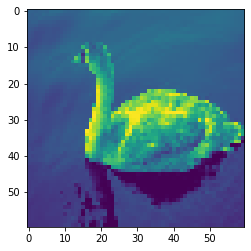

<IPython.core.display.Javascript object>

In [3]:
from PIL import Image

img = Image.open("../data/test/src_duck.jpg").convert("L")
img = img.resize((60, 60))
img = np.array(img)
img = (img-np.mean(img))/np.std(img)
plt.imshow(img)


In [4]:
test = np.random.uniform(-1, 1, img.shape)
tmp = np.random.uniform(-1, 1, (3, 3))

<IPython.core.display.Javascript object>

Done


1665
grad_w done
Debut : Calcul du gradien de phi
Fin : Calcul du gradien de phi
grad done
len = 246
diff de w : 0.0
Gradient de phi : 119641.16901510458


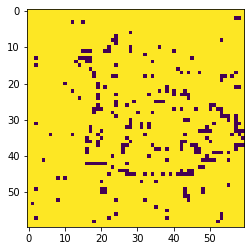

246
grad_w done
Debut : Calcul du gradien de phi
Fin : Calcul du gradien de phi
grad done
len = 154
diff de w : 0.0
Gradient de phi : 25196.2642495447


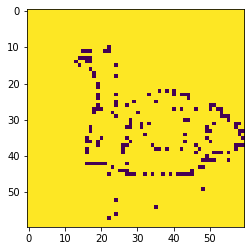

154
grad_w done
Debut : Calcul du gradien de phi
Fin : Calcul du gradien de phi
grad done
len = 154
diff de w : 0.0
Gradient de phi : 0.0


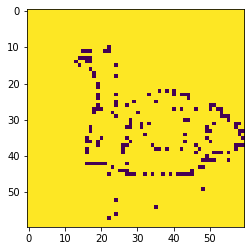

154
grad_w done
Debut : Calcul du gradien de phi
Fin : Calcul du gradien de phi
grad done
len = 154
diff de w : 0.0
Gradient de phi : 0.0


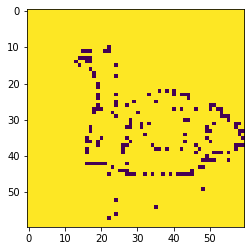

154
grad_w done
Debut : Calcul du gradien de phi
Fin : Calcul du gradien de phi
grad done
len = 154
diff de w : 0.0
Gradient de phi : 0.0


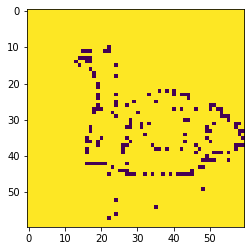

<IPython.core.display.Javascript object>

In [5]:
pp = gradient_descent(
    phi_0=test,
    w0=img,
    u=img,
    step_w=0.01,
    step_phi=10,
    trhld=0.1,
    eps=10,
    lambda_=1,
    mu=1,
    it=5,
    verbose=True,
)

In [6]:
for i in range(pp[1].shape[0]):
    for j in range(pp[1].shape[1]):
        if [i, j] in pp[2]:
            pp[1][i, j] = 0
        else:
            pp[1][i, j] = 1

<IPython.core.display.Javascript object>

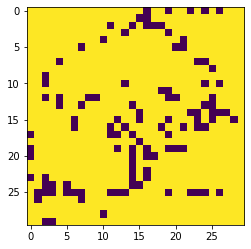

<IPython.core.display.Javascript object>

In [8]:
plt.imshow(pp[1])

In [30]:
positive_part = np.argwhere(phi >= 0).tolist()

NameError: name 'phi' is not defined

<IPython.core.display.Javascript object>

In [20]:
z = get_frontier(image=img, omega=pp, neighborhood_type="4_connex")

<IPython.core.display.Javascript object>

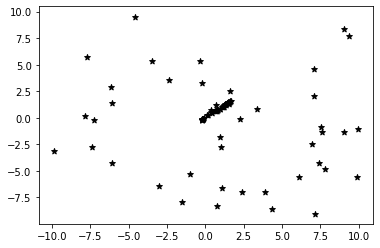

<IPython.core.display.Javascript object>

In [16]:
for i in range(len(pp)):
    plt.scatter(pp[i][0], pp[i][1], color="black", marker="*")
